# Chicago Weather EDA

Google Big Query has an API for obtaining metadata from public datasets hosted by this data warehouse. It contains a standardized query structure that allows you to query data directly from the API. I used this API to query crime data directly into the notebook. 

I collect weather data from years 2014 to 2017 in order to plot trends in weather during these years. I aim to use 2016 data as my train data, and 2017 data as my test data.

## Importing python libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
projectid = "capstone-217502"

## Querying weather data using SQL

In [2]:
weather_2014 = pd.read_gbq("""SELECT *
                              FROM [bigquery-public-data:noaa_gsod.gsod2014] a
                              JOIN [bigquery-public-data:noaa_gsod.stations] b
                              ON a.stn=b.usaf AND a.wban=b.wban
                              WHERE state IS NOT NULL AND state='IL'
                              AND call = 'KORD'""", project_id = projectid)

I join station number from the 2014 weather data (gsod2014) with Air Force station ID of the station data (stations) because they correspond with the same values. I am utilizing the station data (b) in order to filter the location of weather data to Chicago. The call `KORD` represents the unique ID for Chicago O' Hare International airport, the weather station that I am focusing my data on.

In [3]:
weather_2015 = pd.read_gbq("""SELECT *
                              FROM [bigquery-public-data:noaa_gsod.gsod2015] a
                              JOIN [bigquery-public-data:noaa_gsod.stations] b
                              ON a.stn=b.usaf AND a.wban=b.wban
                              WHERE state IS NOT NULL AND state='IL'
                              AND call = 'KORD'""", project_id = projectid)

In [4]:
weather_2016 = pd.read_gbq("""SELECT *
                              FROM [bigquery-public-data:noaa_gsod.gsod2016] a
                              JOIN [bigquery-public-data:noaa_gsod.stations] b
                              ON a.stn=b.usaf AND a.wban=b.wban
                              WHERE state IS NOT NULL AND state='IL'
                              AND call = 'KORD'""", project_id = projectid)

In [5]:
weather_2017 = pd.read_gbq("""SELECT *
                              FROM [bigquery-public-data:noaa_gsod.gsod2017] a
                              JOIN [bigquery-public-data:noaa_gsod.stations] b
                              ON a.stn=b.usaf AND a.wban=b.wban
                              WHERE state IS NOT NULL AND state='IL'
                              AND call = 'KORD'""", project_id = projectid)
weather_2017.head()

,a_stn,a_wban,a_year,a_mo,a_da,a_temp,a_count_temp,a_dewp,a_count_dewp,a_slp,...,b_wban,b_name,b_country,b_state,b_call,b_lat,b_lon,b_elev,b_begin,b_end
0,725300,94846,2017,01,25,37.2,24,34.3,24,1005.3,...,94846,CHICAGO O'HARE INTERNATIONAL,US,IL,KORD,41.995,-87.934,+0201.8,19461001,20181020
1,725300,94846,2017,02,07,43.8,24,43.1,24,998.7,...,94846,CHICAGO O'HARE INTERNATIONAL,US,IL,KORD,41.995,-87.934,+0201.8,19461001,20181020
2,725300,94846,2017,01,17,37.2,24,36.2,24,1012.6,...,94846,CHICAGO O'HARE INTERNATIONAL,US,IL,KORD,41.995,-87.934,+0201.8,19461001,20181020
3,725300,94846,2017,11,05,49.5,24,47.0,24,1009.7,...,94846,CHICAGO O'HARE INTERNATIONAL,US,IL,KORD,41.995,-87.934,+0201.8,19461001,20181020
4,725300,94846,2017,03,13,29.5,24,22.1,24,1024.5,...,94846,CHICAGO O'HARE INTERNATIONAL,US,IL,KORD,41.995,-87.934,+0201.8,19461001,20181020


In [6]:
weather_2016.shape, weather_2017.shape

((366, 43), (365, 43))

## Histograms

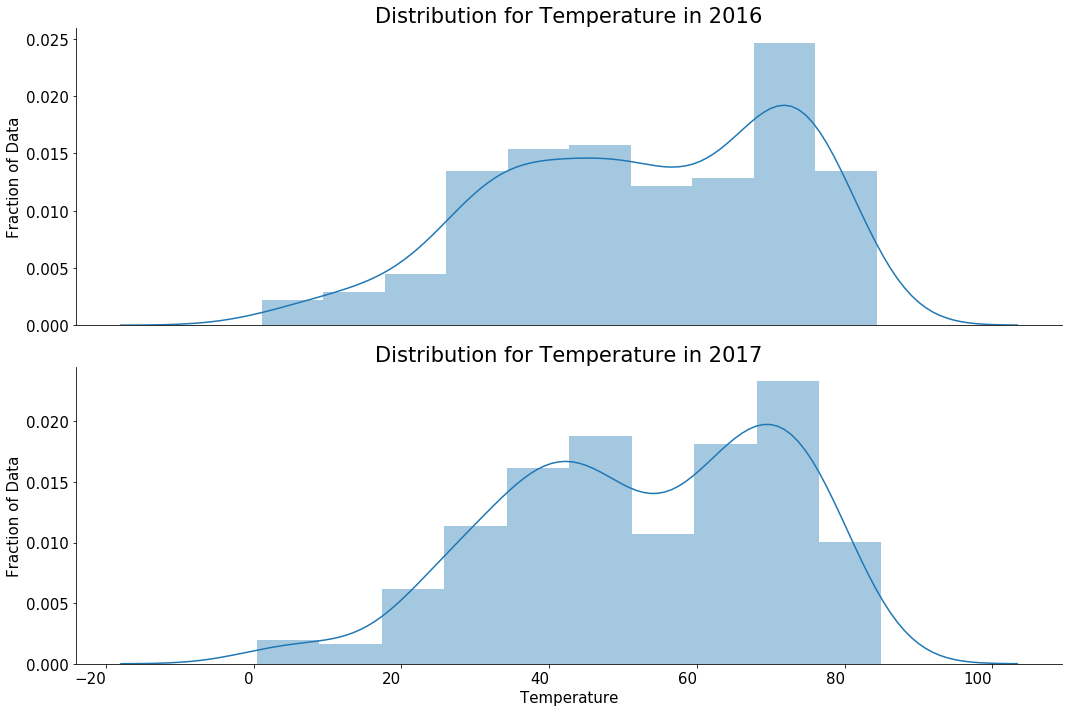

In [7]:
fig, ax = plt.subplots(figsize=(15,10))
plt.subplot(211)
sns.distplot(weather_2016['a_temp'])
sns.despine()
plt.xlabel('')
plt.ylabel('Fraction of Data',fontsize=15)
plt.xticks([], ha='right', fontsize=15)
plt.yticks(fontsize = 15)
plt.title('Distribution for Temperature in 2016', fontsize=21)

plt.subplot(212)
sns.distplot(weather_2017['a_temp'])
sns.despine()
plt.xlabel('Temperature',fontsize=15)
plt.ylabel('Fraction of Data',fontsize=15)
plt.xticks(ha='right', fontsize=15)
plt.yticks(fontsize = 15)
plt.title('Distribution for Temperature in 2017', fontsize=21)
plt.tight_layout();

These plots display the distributions of temperatures throughout the years of 2016 and 2017. We can see that there are more days with temperatures around 45-50 degrees and 65-70 degrees in 2017, meaning there were generally more colder days in 2017.

## Correlation heatmap

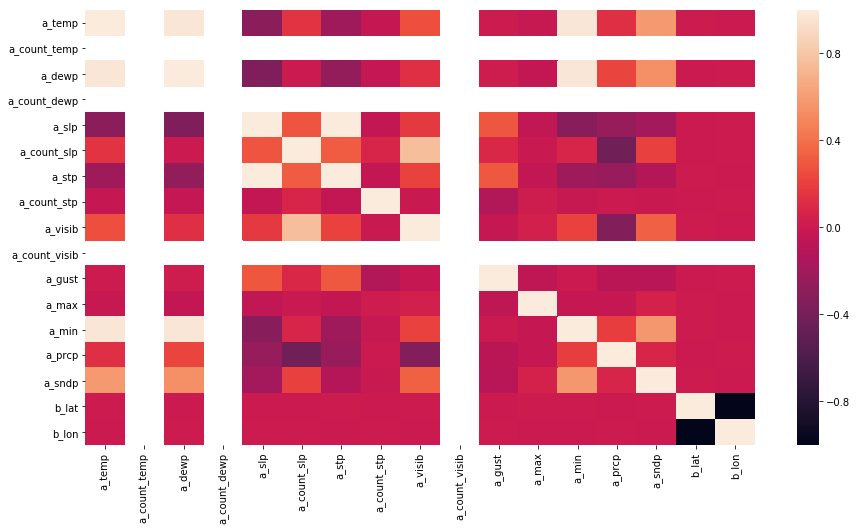

In [8]:
plt.figure(figsize= (15, 8))
sns.heatmap(weather_2016.corr());

From this heatmap, I am able to see which features are worth dropping. First, however, I need to look at all null values. It may be the fact that all null values appear in these irrelevant feature columns.

## Viewing true null values

In [9]:
for df in [weather_2014, weather_2015, weather_2016, weather_2017]:
    df.replace(to_replace=99.99,value=np.NAN,inplace = True)
    df.replace(to_replace=999.9,value=np.NAN,inplace = True)
    df.replace(to_replace=9999.9,value=np.NAN,inplace = True)

Based on the data dictionary, these values represent null values. By changing them to NaN's using numpy, we can use the `isnull` function below to see the true count of nulls.

In [10]:
weather_2017.isnull().sum()

a_stn                       0
a_wban                      0
a_year                      0
a_mo                        0
a_da                        0
a_temp                      0
a_count_temp                0
a_dewp                      0
a_count_dewp                0
a_slp                       0
a_count_slp                 0
a_stp                       1
a_count_stp                 0
a_visib                     0
a_count_visib               0
a_wdsp                      0
a_count_wdsp                0
a_mxpsd                     0
a_gust                    125
a_max                       0
a_flag_max                  0
a_min                       0
a_flag_min                  0
a_prcp                      0
a_flag_prcp                 0
a_sndp                    346
a_fog                       0
a_rain_drizzle              0
a_snow_ice_pellets          0
a_hail                      0
a_thunder                   0
a_tornado_funnel_cloud      0
b_usaf                      0
b_wban    

I evaluated the null count for each weather dataframe, and found that each year of weather data had null values in these columns. I am displaying the weather data with the most nulls above. 

Rather than dropping these observations, I will drop the features containing the nulls (wind gust and snow depth). Wind gust does not seem informative in predicting crime, and snow depth had many low values. I feel that the feature "snow_ice_pellets" represents intense cold weather just as well.

## Dropping columns and assigning types

In [11]:
for df in [weather_2014, weather_2015, weather_2016, weather_2017]:
    df.drop(['a_stn', 'a_wban', 'a_count_temp', 'a_count_dewp', 'a_slp', 'a_count_slp', 'a_stp', 'a_count_stp', 'a_count_visib',
                   'a_count_wdsp', 'a_flag_max', 'a_flag_min', 'a_flag_prcp', 'a_rain_drizzle', 'b_call', 'b_begin', 'b_end', 'b_elev',
                   'a_gust', 'b_country', 'b_state', 'a_dewp', 'a_visib', 'a_sndp', 'a_tornado_funnel_cloud',
                    'a_hail', 'b_name', 'b_usaf', 'b_wban', 'b_lat', 'b_lon'], axis = 1, inplace = True)
    df[['a_year', 'a_mo', 'a_da', 'a_fog', 'a_snow_ice_pellets', 'a_thunder']] = df[['a_year', 'a_mo', 'a_da', 'a_fog', 'a_snow_ice_pellets', 'a_thunder']].astype('int')
    df[['a_wdsp', 'a_mxpsd']] = df[['a_wdsp', 'a_mxpsd']].astype('float')

Some numerical features were assigned as objects. I am assigning these features to their correct type as either integers or floats.

## Imputing nulls

In [12]:
weather_2016[weather_2016.isnull().any(1)]

,a_year,a_mo,a_da,a_temp,a_wdsp,a_mxpsd,a_max,a_min,a_prcp,a_fog,a_snow_ice_pellets,a_thunder
116,2016,4,4,40.6,14.1,22.9,NaN,30.2,0.00,0,1,0
162,2016,4,3,40.1,13.4,26.0,NaN,27.0,0.02,0,1,0


In [13]:
weather_2015[weather_2015.isnull().any(1)]

,a_year,a_mo,a_da,a_temp,a_wdsp,a_mxpsd,a_max,a_min,a_prcp,a_fog,a_snow_ice_pellets,a_thunder
210,2015,12,31,27.0,8.0,9.9,NaN,NaN,0.0,0,0,0


Data from 2015 and 2016 had a few other null values for max and min temperature. Dropping these observations would mean we are losing days of information. We need to impute the max and min temperature values for these days using data from the closest weather station, Northerly Island. From this tableau map (link) of all weather stations in Illinois, we can see the location of nearby weather stations. This is the basis for my choosing of Northerly Island.

In [14]:
northerly = pd.read_gbq("""SELECT *
                        FROM [bigquery-public-data:noaa_gsod.gsod2016] a
                        JOIN [bigquery-public-data:noaa_gsod.stations] b
                        ON a.stn=b.usaf AND a.wban=b.wban
                        WHERE name = 'NORTHERLY ISLAND'
                        AND (mo = '04' OR mo = '12')""", project_id=projectid)

In [15]:
northerly.sort_values(['a_mo', 'a_da'])[['a_mo', 'a_da', 'a_max']].head()

,a_mo,a_da,a_max
40,04,01,68.0
16,04,02,48.9
9,04,03,70.5
22,04,04,70.9
23,04,05,43.9


In [16]:
weather_2016.at[314, 'a_max'] = 70.5
weather_2016.at[177, 'a_max'] = 70.9

Using the index number, I can replace the nulls with true values for those days.

In [17]:
northerly.sort_values(['a_mo', 'a_da'])[['a_mo', 'a_da', 'a_max', 'a_min']].tail()

,a_mo,a_da,a_max,a_min
52,12,27,55.0,26.4
58,12,28,43.5,26.1
31,12,29,44.1,26.1
41,12,30,39.0,26.1
54,12,31,40.8,26.1


In [18]:
weather_2015.at[210, 'a_max'] = 40.8
weather_2015.at[210, 'a_min'] = 26.1

In [19]:
print("There are", weather_2014.isnull().sum().sum(), "nulls in 2014 dataframe.")
print("There are", weather_2015.isnull().sum().sum(), "nulls in 2015 dataframe.")
print("There are", weather_2016.isnull().sum().sum(), "nulls in 2016 dataframe.")
print("There are", weather_2017.isnull().sum().sum(), "nulls in 2017 dataframe.")

There are 0 nulls in 2014 dataframe.
There are 0 nulls in 2015 dataframe.
There are 2 nulls in 2016 dataframe.
There are 0 nulls in 2017 dataframe.


Now that we have clean dataframes, we can accurately plot weather trends per year.

## Average monthly temperature for each year

In [20]:
average_2014 = weather_2014.groupby(by = 'a_mo').mean()
average_2015 = weather_2015.groupby(by = 'a_mo').mean() 
average_2016 = weather_2016.groupby(by = 'a_mo').mean() 
average_2017 = weather_2017.groupby(by = 'a_mo').mean() 

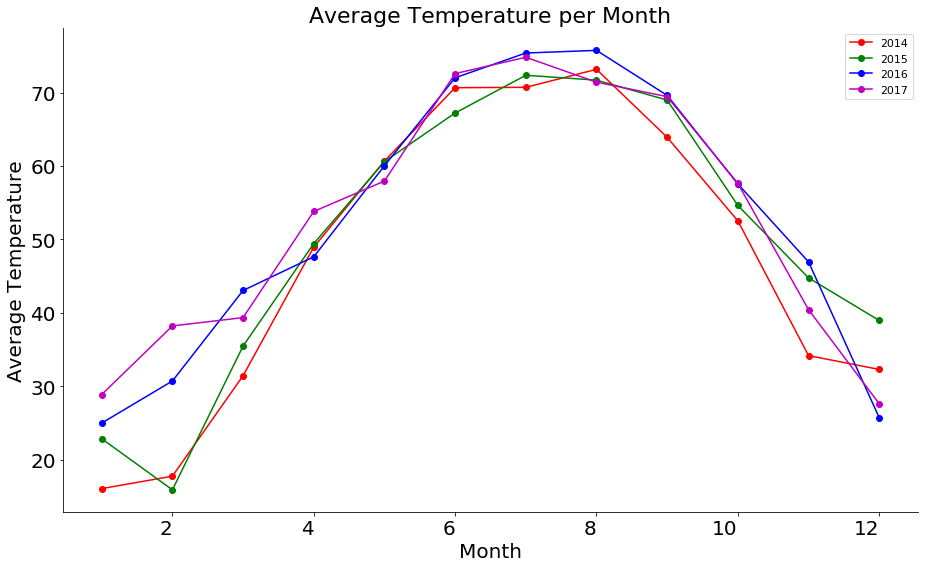

In [21]:
fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(average_2014['a_temp'], marker = 'o', c = 'r', label = 2014)
ax.plot(average_2015['a_temp'], marker = 'o', c = 'g', label = 2015)
ax.plot(average_2016['a_temp'], marker = 'o', c = 'b', label = 2016)
ax.plot(average_2017['a_temp'], marker = 'o', c = 'm', label = 2017)
sns.despine()
ax.set_xlabel('Month',fontsize=20)
ax.set_ylabel('Average Temperature',fontsize=20)
plt.xticks(ha='right', fontsize=20)
plt.yticks(fontsize = 20)
plt.title('Average Temperature per Month', fontsize=22)
plt.legend(loc=1, prop={'size': 11})
plt.tight_layout();

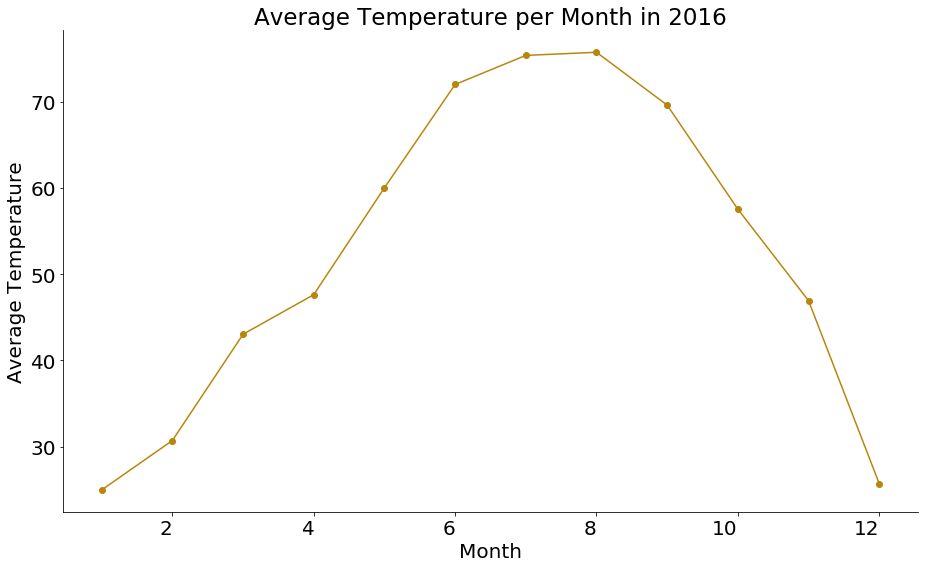

In [31]:
fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(average_2016['a_temp'], marker = 'o', c = '#b8860b', label = 2014)
sns.despine()
ax.set_xlabel('Month',fontsize=20)
ax.set_ylabel('Average Temperature',fontsize=20)
plt.xticks(ha='right', fontsize=20)
plt.yticks(fontsize = 20)
plt.title('Average Temperature per Month in 2016', fontsize=23)
plt.tight_layout();

According to this plot, montly temperature seems to be consistent for each year. Because temperature trends seem to be similar for each year, it makes sense to only use 2016 data to represent all historical weather data in order to predict crime in 2017.

## Plotting weather trends

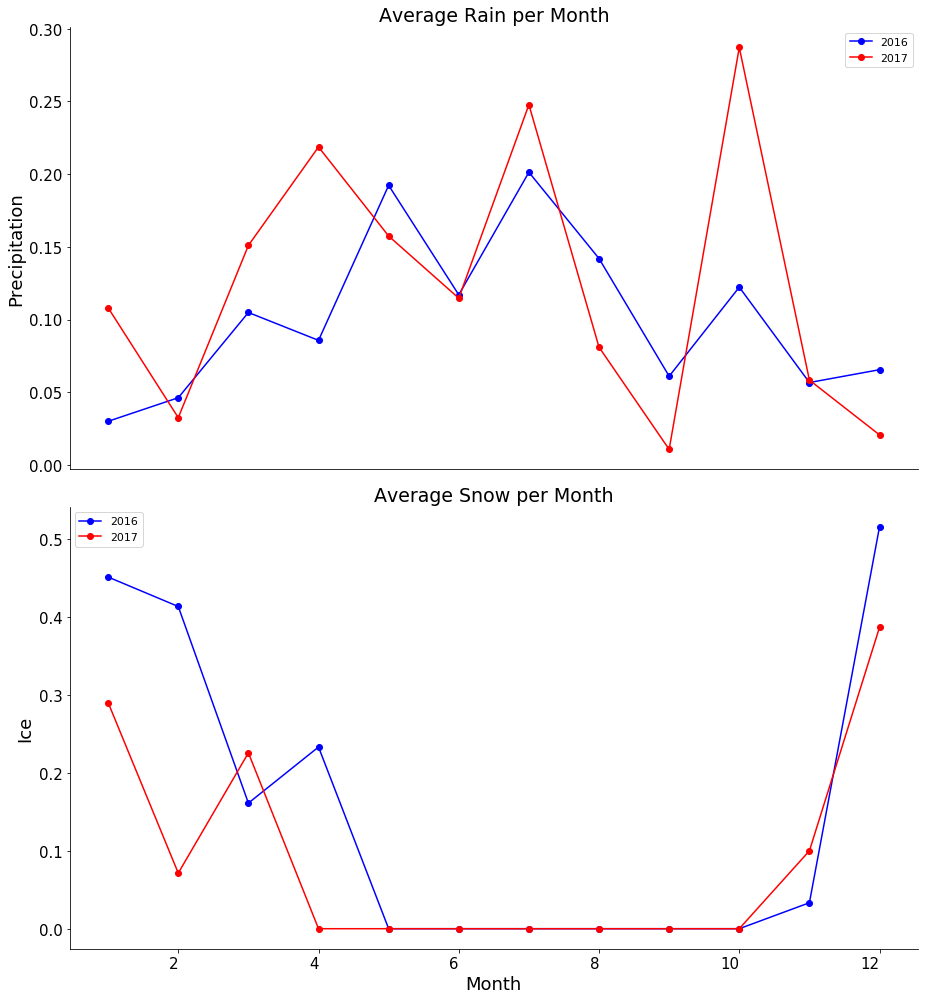

In [22]:
fig, ax = plt.subplots(figsize = (13, 14))
plt.figure(1)         
plt.subplot(211)            
plt.plot(average_2016['a_prcp'], marker = 'o', c = 'b', label = 2016)

plt.subplot(211)
plt.plot(average_2017['a_prcp'], marker = 'o', c = 'r', label = 2017)
sns.despine()
plt.ylabel('Precipitation',fontsize=18)
plt.xticks([])
plt.yticks(fontsize = 15)
plt.title('Average Rain per Month', fontsize=19)
plt.legend(fontsize = 11)

plt.subplot(212)             
plt.plot(average_2016['a_snow_ice_pellets'], marker = 'o', c = 'b', label = 2016)

plt.subplot(212)              
plt.plot(average_2017['a_snow_ice_pellets'], marker = 'o', c = 'r', label = 2017)
sns.despine()
plt.xlabel('Month',fontsize=18)
plt.ylabel('Ice',fontsize=18)
plt.xticks(ha='right', fontsize=15)
plt.yticks(fontsize = 15)
plt.title('Average Snow per Month', fontsize=19)
plt.legend(fontsize = 11)
plt.tight_layout();

The first plot demonstrates the average rain per month in 2016 and 2017. There seems to be a seasonal trend for both years. In 2017, however, there was a dramatic increase in precipitation in April and November. Because 2016 had fewer wet days, it could be the fact that precipitation is not a strong predictor of crime occurences in 2017. Nonetheless, we will see whether it truly has any weight when we model.

The second plot displays the average snow per month for both years. We can see that there was generally less snow in 2017. It is interesting to see that there was more rain in 2017, but less snow, specifically ice pellets. Because ice pellets form directly from precipitation, this can mean that 2017 was generally a hotter year. 

## Saving dataframes

In [24]:
# weather_2016.to_csv('../Data/weather_2016.csv')
# weather_2017.to_csv('../Data/weather_2017.csv')